In [14]:
import pandas as pd
import numpy as np
import json

init_num=18
total = 3010
indicator= np.zeros((total,60,3))

for i in range(total):
    #file = './../record/32node/t_reward/20240423/Metrics/'+str(init_num+i)+'_net_metrics.csv'
    #file = './../record/32node/d_reward/20240422_2/Metrics/'+str(init_num+i)+'_net_metrics.csv'
    file = './../record/32node/20240418_2/Metrics/'+str(init_num+i)+'_net_metrics.csv'
    #file = './../ours_32node/Metrics/'+str(init_num+i)+'_net_metrics.csv'
    #file = './Metrics/'+str(init_num)+'_net_metrics.csv'
    data = pd.read_csv(file)
    for j in range(60):
        indicator[i][j][0] = data["used_bw"][j]/1000
        indicator[i][j][1] = data["delay"][j]
        indicator[i][j][2] = data["pkloss"][j]
#print(indicator[0])

delay_sum = 0
delay_sum_temp = 0
loss_sum = 0
loss_sum_temp = 0
max_uti = 0
max_uti_temp = 0
first_max_uti = 0
delay_value_list = []
mlu_list = []
bwd =  np.full(60, 200000)

for i in range(total):
    delay_sum_temp = 0
    delay_sum = 0
    for j in range(60):
        delay_sum_temp += indicator[i][j][1]
    delay_sum = delay_sum + delay_sum_temp
    delay_value_list.append(float(delay_sum))
path = 'delay_value.txt'
f = open(path, 'w')
f.writelines(str(delay_value_list))
f.close()

for i in range(total):
    max_uti_temp = 0
    for j in range(60):
        uti = indicator[i][j][0]/bwd[j]
        #print(uti)
        """if uti > max_uti:
            #print(i,j)
            print(i,j,indicator[i][j][0],bwd[j],uti)
            max_uti = uti"""
        if uti > max_uti_temp:
            max_uti_temp = uti
    mlu_list.append(float(max_uti_temp))

path = 'mlu_value.txt'
f = open(path, 'w')
f.writelines(str(mlu_list))
f.close()

0.8151509677981014


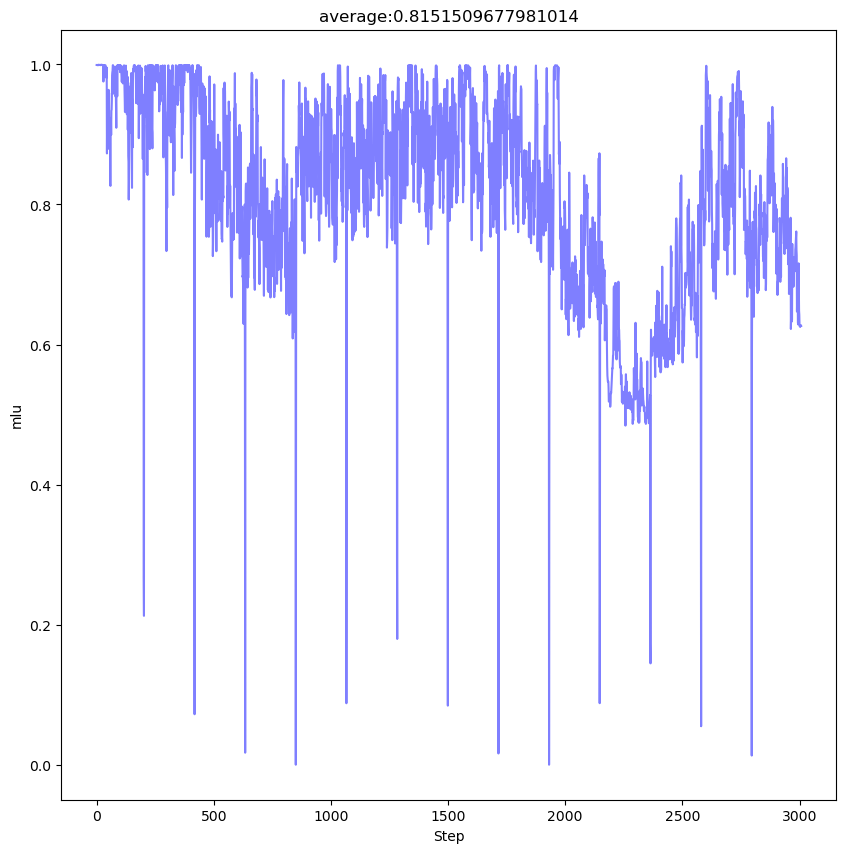

In [15]:
import numpy as np
import matplotlib.pyplot as plt 


def get_smooth(l, s_v):
    s_l = []
    for i in range(len(l)):
        s_l.append(l[i] * (1 - s_v) + s_l[i-1] * s_v if i > 0 else l[i])
    return s_l


if __name__ == '__main__':
    f = open('./mlu_value.txt', 'r')
    reward = []
    plt_r = []
    x = []
    for line in f.readlines():
        reward.append(line)
    f.close
    str1 = str(reward).split(',')
    for item in str1[1:-1]:
        plt_r.append((float(item)))
    
    title = 'reward_training_mlu'

    average = np.mean(plt_r)
    print(average)
    plt.figure(figsize=(10,10))
    plt.title('average:'+str(average))
    plt.xlabel('Step')
    plt.ylabel('mlu')
    #plt.ylim(0.5,0.6)
    plt.plot(np.arange(len(plt_r)), plt_r, alpha = 0.5, color='blue')  
    #plt_r = get_smooth(plt_r,0.5)
    #plt.plot(np.arange(len(plt_r)), plt_r, alpha = 0.2, color='C0')
    #plt_r = get_smooth(plt_r,0.95)
    #plt.plot(np.arange(len(plt_r)), plt_r, alpha = 0.5, color='blue')  
    plt.savefig(title+'.png', dpi=200, bbox_inches='tight')
    plt.show()

3.3646967694518564


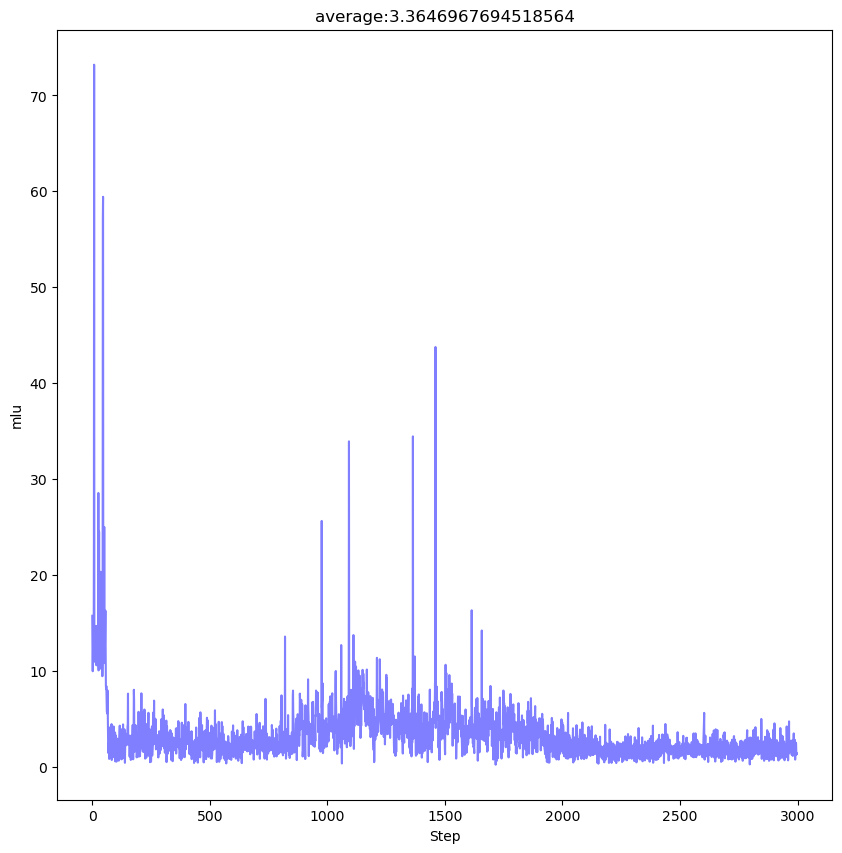

In [18]:
import numpy as np
import matplotlib.pyplot as plt 


def get_smooth(l, s_v):
    s_l = []
    for i in range(len(l)):
        s_l.append(l[i] * (1 - s_v) + s_l[i-1] * s_v if i > 0 else l[i])
    return s_l


if __name__ == '__main__':
    f = open('./delay_value.txt', 'r')
    reward = []
    plt_r = []
    x = []
    for line in f.readlines():
        reward.append(line)
    f.close
    str1 = str(reward).split(',')
    for item in str1[1:-1]:
        plt_r.append((float(item)/60))
    
    title = '20230916training_mlu'

    average = np.mean(plt_r)
    print(average)
    plt.figure(figsize=(10,10))
    plt.title('average:'+str(average))
    plt.xlabel('Step')
    plt.ylabel('mlu')
    #plt.ylim(0.5,0.6)
    plt.plot(np.arange(len(plt_r)), plt_r, alpha = 0.5, color='blue')  
    #plt_r = get_smooth(plt_r,0.5)
    #plt.plot(np.arange(len(plt_r)), plt_r, alpha = 0.2, color='C0')
    #plt_r = get_smooth(plt_r,0.95)
    #plt.plot(np.arange(len(plt_r)), plt_r, alpha = 0.5, color='blue')  
    plt.savefig('mlu'+title+'.png', dpi=200, bbox_inches='tight')
    plt.show()